# Travelling Salesman Problem!

Welcome to the assignment **#1** related to **Coding Homeworks** section of the **Artificial Intelligence** course at **Shahid Beheshti University**! ([Course repository link](https://github.com/SBU-CE/Artificial-Intelligence)).

In this notebook, you will:

*   Roll up your sleeves and start writing codes in **python**
*   Implement Travel Salesman solution calculator using **Genetic Algorithm**


The traveling salesman problem (also called the travelling salesperson problem or TSP) asks the following question: "Given a *list of cities* and the *distances* between each pair of cities, what is *the shortest possible route* that visits each city exactly once and returns to the origin city?" It is an NP-hard problem in combinatorial optimization, important in theoretical computer science and operations research.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Initial Population

### Individual

An **individual** is characterized by a set of parameters (variables) known as Genes. In this problem **genes** are cities that each of them contains `x` and `y` attribute, each **individual** is a permutation of cities that shows the route to the talesman.

First you should implement `distance` function using Euclidean distance formula.

$\begin{gather*}
d=\sqrt{( x_{2} -x_{1})^{2} +( y_{2} -y_{1})^{2}}
\end{gather*}$


In [ ]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        ### START CODE HERE ### (≈3 lines)
        # Calculate Euclidean distance
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        ### END CODE HERE ###
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [ ]:
city1 = City(1, 1)
city2 = City(7, 8)
print(f'Distance : {city1.distance(city2)}')

Distance : 9.219544457292887


**Expected Output**
<table>
    <tr>
    <td>
        Distance : 9.219544457292887
    </td>
    </tr>
</table>

`create_cities` function returns cities of our world.

In [ ]:
# utils
def create_cities(n=25):
    city_list = []
    for i in range(n):
        city_list.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))
    return city_list

In [ ]:
city_list = create_cities()

print(f'Cities of our world are : {city_list}')

Cities of our world are : [(72,96), (83,89), (81,131), (51,126), (2,60), (67,28), (148,62), (157,191), (50,178), (161,133), (5,91), (125,59), (44,61), (51,157), (69,84), (128,189), (58,8), (194,166), (158,104), (46,30), (60,92), (13,139), (145,2), (168,98), (183,95)]


Now you can see the cities of our world!

In [ ]:
# utils
def show_cities(city_list):
    for city in city_list:
        plt.scatter(city.x, city.y)

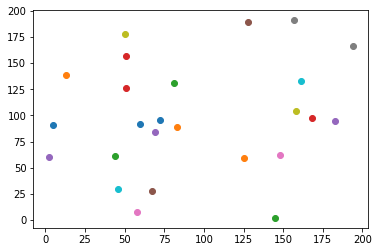

In [ ]:
show_cities(city_list)

`create_route` function creates a route () that travels `n` cities by shuffling city_list. **city_list** is the individual and it's list of cities. Its *order* shows the travel salesman, how to travel between cities. You should implement this function by using `random.sample` function.

In [ ]:
def create_route(city_list):
    ### START CODE HERE ### (≈1 lines)
    route = random.sample(city_list, len(city_list))
    ### END CODE HERE ###
    return route

In [ ]:
# utils
def plot_talesman_route(cities, title=None):
    for i in range(-1, len(cities)-1):
        plt.scatter(cities[i].x, cities[i].y)
        plt.quiver(cities[i].x, cities[i].y, cities[i+1].x-cities[i].x, cities[i+1].y-cities[i].y, angles='xy', scale_units='xy', scale=1)
    if plt is not None:
        plt.title(title)
    plt.show()

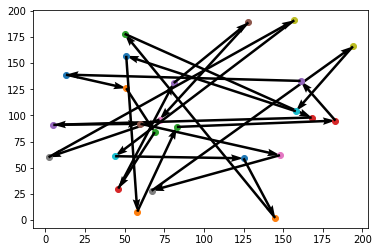

In [ ]:
city_list = create_route(city_list)

# plot the route
plot_talesman_route(city_list)

### Population

The process of genetic algorithm begins with a set of individuals which is called a Population. You should initialize population by implement `initial_population` function using `create_route` function

In [ ]:
def initial_population(population_size, city_list):
    population = []
    ### START CODE HERE ### (≈2 lines)
    for i in range(0, population_size):
        population.append(create_route(city_list))
    ### END CODE HERE ###
    return population

In [ ]:
sample_generation = initial_population(5, city_list)

for i in range(len(sample_generation)):
    print(f'individual{i} : {sample_generation[i]}')

individual0 : [(128,189), (60,92), (72,96), (51,126), (2,60), (183,95), (83,89), (44,61), (148,62), (157,191), (161,133), (69,84), (125,59), (5,91), (158,104), (13,139), (145,2), (81,131), (58,8), (194,166), (50,178), (67,28), (168,98), (51,157), (46,30)]
individual1 : [(51,126), (168,98), (145,2), (157,191), (58,8), (158,104), (83,89), (194,166), (2,60), (67,28), (161,133), (51,157), (125,59), (50,178), (5,91), (44,61), (46,30), (148,62), (60,92), (69,84), (183,95), (81,131), (13,139), (72,96), (128,189)]
individual2 : [(46,30), (67,28), (145,2), (60,92), (51,126), (81,131), (183,95), (158,104), (50,178), (148,62), (69,84), (125,59), (2,60), (168,98), (72,96), (157,191), (5,91), (44,61), (58,8), (161,133), (13,139), (128,189), (194,166), (83,89), (51,157)]
individual3 : [(5,91), (67,28), (44,61), (183,95), (72,96), (148,62), (46,30), (69,84), (157,191), (81,131), (161,133), (145,2), (194,166), (168,98), (60,92), (58,8), (158,104), (51,157), (125,59), (13,139), (128,189), (83,89), (2,6

## Fitness Function

The fitness function determines how fit an individual is. You should give a **fitness score** to each individual. The probability that an individual will be selected for reproduction is based on its fitness score.

In this problem, fitness is based on the distance traveled on chosen route. The more distance, the lower fitness it is.
First you should implement `route_distance` function using `City.distance` function. Then complete `route_fitness` function using below equation.


$\begin{gather*}
\mathrm{fitness} = \frac{1}{\mathrm{distance}}
\end{gather*}$

In [ ]:
def route_distance(route):
    path_distance = 0
    ### START CODE HERE ###
    for i in range(0, len(route)):
        from_city = route[i]
        to_city = None
        if i + 1 < len(route):
            to_city = route[i + 1]
        else:
            to_city = route[0]
        path_distance += from_city.distance(to_city)
    ### END CODE HERE ###
    return path_distance

In [ ]:
def route_fitness(route):
    ### START CODE HERE ### (≈1 lines)
    fitness = 1 / float(route_distance(route))
    ### END CODE HERE ###
    return fitness

In [ ]:
print(f'Sample individual distance : {route_distance(city_list)}')
print(f'Sample individual fitness : {route_fitness(city_list)}')

Sample individual distance : 2676.325254697347
Sample individual fitness : 0.00037364666280559583


## Selection

The idea of selection phase is to select the fittest individuals and let them pass their genes to the next generation. You should implement rank_routes function to sort individuals (routes) in the generation by their fitness.

You can use python built-in function `sorted()` with `key = lambda x: route_fitness(x)` argument.

In [ ]:
def rank_routes(generation):
    ### START CODE HERE ###
    sorted_generation = sorted(generation, key = lambda x: route_fitness(x), reverse = True)
    ### END CODE HERE ###
    return sorted_generation

print(route_fitness(rank_routes(sample_generation)[0]))
print(route_fitness(rank_routes(sample_generation)[1]))

0.00041295311656319413
0.0004001558439557957
0.8099941100078085


Read about **elite individuals** in genetic algorithm, then implement below function using implemented `rank_routes` function. It returns selected individuals (routes), in future we will use them in mating pool.

In [ ]:
def selection(generation, elite_size):
    selection_results = []
    ### START CODE HERE ###
    generation_ranked = rank_routes(generation)
    
    selection_results = []
    best_fitness_yet = route_fitness(generation_ranked[0])
    for i in range(0, elite_size):
        selection_results.append(generation_ranked[i])
    for i in range(0, len(generation_ranked) - elite_size):
        pick = 100*random.random()
        while True:
            random_idx = int(random.random()*len(generation_ranked))
            percentage = (route_fitness(generation_ranked[random_idx]) / best_fitness_yet)*100
            if pick <= percentage:
                selection_results.append(generation_ranked[random_idx])
                break

    ### END CODE HERE ###
    return selection_results

In [ ]:
mating_pool = selection(sample_generation, 2)
for i in range(len(mating_pool)):
    print(f'selected{i} : {mating_pool[i]}')

selected0 : [(125,59), (128,189), (158,104), (2,60), (183,95), (161,133), (194,166), (81,131), (67,28), (72,96), (145,2), (51,157), (51,126), (13,139), (157,191), (83,89), (168,98), (46,30), (58,8), (148,62), (69,84), (60,92), (44,61), (50,178), (5,91)]
selected1 : [(46,30), (67,28), (145,2), (60,92), (51,126), (81,131), (183,95), (158,104), (50,178), (148,62), (69,84), (125,59), (2,60), (168,98), (72,96), (157,191), (5,91), (44,61), (58,8), (161,133), (13,139), (128,189), (194,166), (83,89), (51,157)]
selected2 : [(51,126), (168,98), (145,2), (157,191), (58,8), (158,104), (83,89), (194,166), (2,60), (67,28), (161,133), (51,157), (125,59), (50,178), (5,91), (44,61), (46,30), (148,62), (60,92), (69,84), (183,95), (81,131), (13,139), (72,96), (128,189)]
selected3 : [(46,30), (67,28), (145,2), (60,92), (51,126), (81,131), (183,95), (158,104), (50,178), (148,62), (69,84), (125,59), (2,60), (168,98), (72,96), (157,191), (5,91), (44,61), (58,8), (161,133), (13,139), (128,189), (194,166), (83

## Crossover

Crossover is the most significant phase in a genetic algorithm. Implement crossover function based on your opinion.

In [ ]:
def crossover(parent1, parent2):
    child = []
    ### START CODE HERE ###
    child_p1 = []
    child_p2 = []

    parnet1_crossover_point = int(random.random() * len(parent1))
    parnet2_crossover_point = int(random.random() * len(parent2))

    start_point = min(parnet1_crossover_point, parnet2_crossover_point)
    end_point = max(parnet1_crossover_point, parnet2_crossover_point)

    for i in range(start_point, end_point):
        child_p1.append(parent1[i])

    child_p2 = [item for item in parent2 if item not in child_p1]

    child = child_p1 + child_p2
    ### END CODE HERE ###
    return child

city_list_sample_crossover = create_cities(10)
population_sample_crossover = initial_population(5, city_list_sample_crossover)
parent1_sample_crossover = population_sample_crossover[0]
parent2_sample_crossover = population_sample_crossover[1]
child_sample_crossover = crossover(parent1_sample_crossover, parent2_sample_crossover)
print(f'parent1 : {parent1_sample_crossover}')
print(f'parent2 : {parent2_sample_crossover}')
print(f'Their child : {child_sample_crossover}')

parent1 : [(72,96), (157,191), (50,178), (2,60), (67,28), (81,131), (83,89), (51,126), (148,62), (161,133)]
parent2 : [(148,62), (83,89), (67,28), (51,126), (161,133), (2,60), (50,178), (81,131), (157,191), (72,96)]
Their child : [(51,126), (148,62), (83,89), (67,28), (161,133), (2,60), (50,178), (81,131), (157,191), (72,96)]


Now use implemented `crossover` function to crossover your generation. Selecting parents are based on your opinion too!

Remember that population size of the generations must be the same.

In [ ]:
def crossover_generation(mating_pool, eliteSize):
    children = []
    ### START CODE HERE ###
    length = len(mating_pool) - eliteSize
    pool = random.sample(mating_pool, len(mating_pool))

    for i in range(0,eliteSize):
        children.append(mating_pool[i])

    for i in range(0, length):
        child = crossover(pool[i], pool[len(mating_pool)-i-1])
        children.append(child)
    ### END CODE HERE ###
    return children

## Mutation

Mutation occurs to maintain diversity within the population and prevent premature convergence. You should implement mutate by swapping order of two cities of selected individual (routes).

In [ ]:
def mutate(individual, mutation_rate):
    ### START CODE HERE ###
    for swapped in range(len(individual)):
        if(random.random() < mutation_rate):
            swap_with = int(random.random() * len(individual))

            city1 = individual[swapped]
            city2 = individual[swap_with]

            individual[swapped] = city2
            individual[swap_with] = city1
    ### END CODE HERE ###
    return individual

print(f'before mutation : {child_sample_crossover}')
print(f'after mutation : {mutate(child_sample_crossover, 0.5)}')

before mutation : [(72,96), (83,89), (2,60), (148,62), (81,131), (157,191), (161,133), (51,126), (67,28), (50,178)]
after mutation : [(83,89), (72,96), (2,60), (148,62), (81,131), (51,126), (157,191), (161,133), (67,28), (50,178)]


Now use implemented `mutate` function to mutate individuals in given generation. 

In [ ]:
def mutate_population(population, mutation_rate):
    mutated_generation = []
    ### START CODE HERE ###
    for ind in range(0, len(population)):
        mutated_ind = mutate(population[ind], mutation_rate)
        mutated_generation.append(mutated_ind)
    ### END CODE HERE ###
    return mutated_generation

## All Together

Now you should implement `next_generation` function to calculate next generation by getting `current_generation`, `elite_size` and `mutation_rate` as inputs. Use implemented functions `rank_routes`, `selection`, `crossover_generation` and `mutate_population`.

In [ ]:
def next_generation(current_generation, elite_size, mutation_rate):
    ### START CODE HERE ###
    generation_ranked = rank_routes(current_generation)
    selection_results = selection(generation_ranked, elite_size)
    children = crossover_generation(selection_results, elite_size)
    nextGeneration = mutate_population(children, mutation_rate)
    ### END CODE HERE ###
    return nextGeneration

Implement genetic algorithm using implemented functions `initial_population`, `rank_routes`, `route_distance` and `next_generation`.

In [ ]:
def genetic_algorithm(cities, population_size, elite_size, mutation_rate, generations, verbosity=3):
    ### START CODE HERE ###
    generation = initial_population(population_size, cities)
    ### END CODE HERE ###

    if verbosity > 0:
        initial_route = rank_routes(generation)[0]
        print(f'Initial distance: {route_distance(initial_route)}')
    progress = []

    ### START CODE HERE ###
    for i in range(0, generations):
        generation = next_generation(generation, elite_size, mutation_rate)
        if verbosity > 0:
            progress.append(route_distance(rank_routes(generation)[0]))
    ### END CODE HERE ###

    best_route = rank_routes(generation)[0]

    if verbosity > 0:
        print(f'Final distance: {route_distance(best_route)}')


    if verbosity > 1:
        plt.plot(progress)
        plt.ylabel('Distance')
        plt.xlabel('Generation')
        plt.show()
    
    if verbosity > 2:
        plot_talesman_route(initial_route, 'Initial Route')
        plot_talesman_route(best_route, 'Best Route')

    return best_route

Feel free to change paramters!

Initial distance: 2011.8555763529532
Final distance: 950.2774420267336


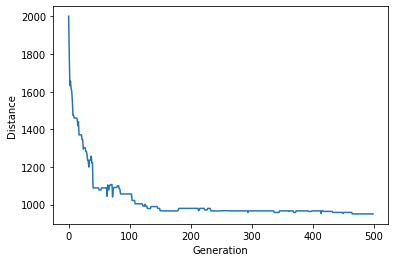

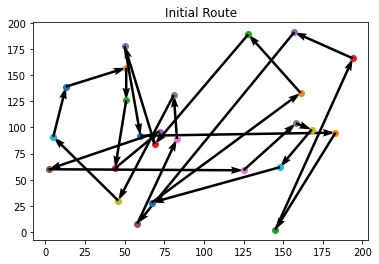

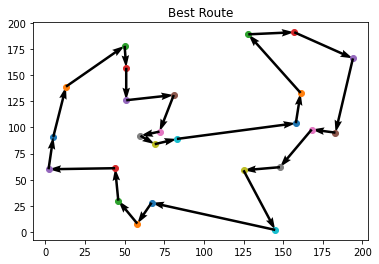

In [ ]:
best_route = genetic_algorithm(cities=city_list, population_size=100, elite_size=20, mutation_rate=0.01, generations=500)